# Chicago Car Crash Analysis

## Importing Packages

In [99]:
# Importing packages needed for this notebook

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
# Reading the data in

df_crashes = pd.read_csv("data/Traffic_Crashes_-_Crashes.csv")
df_vehicles = pd.read_csv("data/Traffic_Crashes_-_Vehicles.csv")
df_people = pd.read_csv("data/Traffic_Crashes_-_People.csv")

/var/folders/kl/l56g5k7x0xqgjd17r78jnyxc0000gn/T/ipykernel_16990/2665594103.py:4: DtypeWarning: Columns (2,19,21,40,41,42,44,48,49,50,53,55,58,59,61,71) have mixed types. Specify dtype option on import or set low_memory=False.
  df_vehicles = pd.read_csv("data/Traffic_Crashes_-_Vehicles.csv")
/var/folders/kl/l56g5k7x0xqgjd17r78jnyxc0000gn/T/ipykernel_16990/2665594103.py:5: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df_people = pd.read_csv("data/Traffic_Crashes_-_People.csv")


## Creating a Master DataFrame

In [101]:
df_joined = pd.merge(df_crashes, pd.merge(df_vehicles, df_people, on="CRASH_RECORD_ID"), on="CRASH_RECORD_ID")

## Info and column names of each table

In [102]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3594423 entries, 0 to 3594422
Columns: 150 entries, CRASH_RECORD_ID to CELL_PHONE_USE
dtypes: float64(25), int64(8), object(117)
memory usage: 4.0+ GB


## Takeaway

- 3,594,423 observations
- 150 combined columns
- 4 GB combined memory file

In [103]:
df_crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778847 entries, 0 to 778846
Data columns (total 50 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                778847 non-null  object 
 1   RD_NO                          774292 non-null  object 
 2   CRASH_DATE_EST_I               58506 non-null   object 
 3   CRASH_DATE                     778847 non-null  object 
 4   POSTED_SPEED_LIMIT             778847 non-null  int64  
 5   TRAFFIC_CONTROL_DEVICE         778847 non-null  object 
 6   DEVICE_CONDITION               778847 non-null  object 
 7   WEATHER_CONDITION              778847 non-null  object 
 8   LIGHTING_CONDITION             778847 non-null  object 
 9   FIRST_CRASH_TYPE               778847 non-null  object 
 10  TRAFFICWAY_TYPE                778847 non-null  object 
 11  LANE_CNT                       199006 non-null  float64
 12  ALIGNMENT                     

In [104]:
df_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1588937 entries, 0 to 1588936
Data columns (total 72 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   CRASH_UNIT_ID             1588937 non-null  int64  
 1   CRASH_RECORD_ID           1588937 non-null  object 
 2   RD_NO                     1579642 non-null  object 
 3   CRASH_DATE                1588937 non-null  object 
 4   UNIT_NO                   1588937 non-null  int64  
 5   UNIT_TYPE                 1586855 non-null  object 
 6   NUM_PASSENGERS            235108 non-null   float64
 7   VEHICLE_ID                1552556 non-null  float64
 8   CMRC_VEH_I                29662 non-null    object 
 9   MAKE                      1552551 non-null  object 
 10  MODEL                     1552406 non-null  object 
 11  LIC_PLATE_STATE           1410532 non-null  object 
 12  VEHICLE_YEAR              1301948 non-null  float64
 13  VEHICLE_DEFECT            1

In [105]:
df_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1710078 entries, 0 to 1710077
Data columns (total 30 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   PERSON_ID              object 
 1   PERSON_TYPE            object 
 2   CRASH_RECORD_ID        object 
 3   RD_NO                  object 
 4   VEHICLE_ID             float64
 5   CRASH_DATE             object 
 6   SEAT_NO                float64
 7   CITY                   object 
 8   STATE                  object 
 9   ZIPCODE                object 
 10  SEX                    object 
 11  AGE                    float64
 12  DRIVERS_LICENSE_STATE  object 
 13  DRIVERS_LICENSE_CLASS  object 
 14  SAFETY_EQUIPMENT       object 
 15  AIRBAG_DEPLOYED        object 
 16  EJECTION               object 
 17  INJURY_CLASSIFICATION  object 
 18  HOSPITAL               object 
 19  EMS_AGENCY             object 
 20  EMS_RUN_NO             object 
 21  DRIVER_ACTION          object 
 22  DRIVER_VISION     

## .describe()

In [106]:
df_joined.describe()

,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,...,OCCUPANT_CNT,CMV_ID,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_ID_y,SEAT_NO,AGE,BAC_RESULT VALUE
count,3.594423e+06,9.306690e+05,3.594423e+06,3.594399e+06,3.594423e+06,3.594423e+06,3.594423e+06,3.594423e+06,3.594423e+06,3.594423e+06,...,3.510271e+06,35502.000000,4435.000000,149.000000,6041.000000,8745.000000,3.519774e+06,734498.000000,2.553255e+06,4600.000000
mean,2.894418e+01,9.342141e+00,3.640219e+03,1.233799e+03,2.199066e+00,3.127782e-01,1.954417e-03,3.188718e-02,1.760341e-01,1.029025e-01,...,1.369887e+00,8985.305081,46.877114,47.134228,50.844066,12.505317,8.079381e+05,4.166258,3.776009e+01,0.169220
std,5.672710e+00,2.109683e+03,2.865836e+03,7.017924e+02,6.513109e-01,8.529651e-01,5.111491e-02,2.333315e-01,6.336883e-01,4.646457e-01,...,1.340935e+00,5285.456098,22.278165,28.397673,29.901491,481.617485,4.663225e+05,2.212339,1.710080e+01,0.100173
min,0.000000e+00,0.000000e+00,0.000000e+00,1.110000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000e+00,1.000000,-1.770000e+02,0.000000
25%,3.000000e+01,2.000000e+00,1.204000e+03,7.140000e+02,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+00,4356.000000,40.000000,25.000000,32.000000,2.000000,4.054940e+05,3.000000,2.500000e+01,0.120000
50%,3.000000e+01,2.000000e+00,3.180000e+03,1.134000e+03,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+00,8854.000000,53.000000,50.000000,53.000000,3.000000,8.001075e+05,3.000000,3.500000e+01,0.170000
75%,3.000000e+01,4.000000e+00,5.524000e+03,1.814000e+03,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+00,13609.750000,53.000000,55.000000,65.000000,5.000000,1.211854e+06,6.000000,5.000000e+01,0.220000
max,9.900000e+01,1.191625e+06,4.511000e+05,6.100000e+03,1.800000e+01,2.100000e+01,4.000000e+00,1.000000e+01,2.100000e+01,1.500000e+01,...,9.900000e+01,18191.000000,740.000000,123.000000,999.000000,26009.000000,1.617697e+06,12.000000,1.100000e+02,1.000000


In [107]:
df_crashes.describe()

,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,Boundaries - ZIP Codes
count,778847.000000,1.990060e+05,778847.000000,778842.000000,778847.000000,777144.000000,777144.000000,777144.000000,777144.000000,777144.000000,777144.000000,777144.0,778847.000000,778847.000000,778847.000000,773629.000000,773629.000000,773247.000000
mean,28.396907,1.333032e+01,3685.933360,1242.603116,2.034754,0.188778,0.001194,0.020112,0.106705,0.060767,2.004773,0.0,13.205675,4.122012,6.696038,41.854822,-87.673523,32.233258
std,6.192316,2.961623e+03,2888.342841,705.370152,0.452267,0.564532,0.037466,0.166103,0.421350,0.317185,1.159469,0.0,5.565372,1.980178,3.367947,0.334037,0.678644,19.205914
min,0.000000,0.000000e+00,0.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,-87.936193,1.000000
25%,30.000000,2.000000e+00,1245.000000,714.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,4.000000,41.782381,-87.721652,15.000000
50%,30.000000,2.000000e+00,3200.000000,1211.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,7.000000,41.874687,-87.674050,32.000000
75%,30.000000,4.000000e+00,5600.000000,1822.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,10.000000,41.924284,-87.633269,52.000000
max,99.000000,1.191625e+06,451100.000000,6100.000000,18.000000,21.000000,4.000000,10.000000,21.000000,15.000000,61.000000,0.0,23.000000,7.000000,12.000000,42.022780,0.000000,61.000000


In [108]:
df_vehicles.describe()

,CRASH_UNIT_ID,UNIT_NO,NUM_PASSENGERS,VEHICLE_ID,VEHICLE_YEAR,OCCUPANT_CNT,CMV_ID,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT
count,1.588937e+06,1.588937e+06,235108.000000,1.552556e+06,1.301948e+06,1.552556e+06,16335.000000,2308.000000,66.000000,2806.000000,4183.000000
mean,8.496932e+05,3.942327e+00,1.471736,8.080897e+05,2.013942e+03,1.079031e+00,9112.995654,48.467504,44.530303,53.204562,9.934019
std,4.922384e+05,2.997178e+03,1.063307,4.665830e+05,1.398282e+02,7.840426e-01,5273.816457,20.972049,28.290373,31.488518,402.095125
min,2.000000e+00,0.000000e+00,1.000000,2.000000e+00,1.900000e+03,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.223680e+05,1.000000e+00,1.000000,4.043528e+05,2.007000e+03,1.000000e+00,4506.500000,45.000000,24.250000,35.000000,2.000000
50%,8.505170e+05,2.000000e+00,1.000000,8.072105e+05,2.013000e+03,1.000000e+00,9136.000000,53.000000,49.000000,53.000000,3.000000
75%,1.276142e+06,2.000000e+00,2.000000,1.211314e+06,2.016000e+03,1.000000e+00,13699.500000,53.000000,53.000000,65.000000,5.000000
max,1.699579e+06,3.778035e+06,59.000000,1.617699e+06,9.999000e+03,9.900000e+01,18191.000000,740.000000,123.000000,999.000000,26009.000000


In [86]:
df_people.describe()

,VEHICLE_ID,SEAT_NO,AGE,BAC_RESULT VALUE
count,1.675923e+06,346017.000000,1.211091e+06,1940.000000
mean,8.036864e+05,4.163801,3.787037e+01,0.169784
std,4.669772e+05,2.208931,1.709925e+01,0.102296
min,2.000000e+00,1.000000,-1.770000e+02,0.000000
25%,3.998430e+05,3.000000,2.500000e+01,0.120000
50%,7.946780e+05,3.000000,3.500000e+01,0.170000
75%,1.208776e+06,6.000000,5.000000e+01,0.220000
max,1.617697e+06,12.000000,1.100000e+02,1.000000


In [109]:
df_joined.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,bc3c61d5dbe43abd180a650279a7623d9ecda1a520d8ff...,NaN,NaN,11/09/2023 02:40:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,...,NaN,OVERCORRECTED,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,93178a4bc7997b3ef129dff65a54c3d3892a15155c05f9...,NaN,NaN,11/09/2023 02:30:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,...,NaN,WRONG WAY/SIDE,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,93178a4bc7997b3ef129dff65a54c3d3892a15155c05f9...,NaN,NaN,11/09/2023 02:30:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,...,NaN,WRONG WAY/SIDE,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,93178a4bc7997b3ef129dff65a54c3d3892a15155c05f9...,NaN,NaN,11/09/2023 02:30:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,...,NaN,WRONG WAY/SIDE,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,ed4ce4638847ebd835a2f72e1353938b431ecfc5e1ba26...,NaN,NaN,11/09/2023 02:20:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,...,NaN,IMPROPER PASSING,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


In [110]:
# Checking out the PRIN_CONTRIBUTORY_CAUSE column

df_joined['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

PRIM_CONTRIBUTORY_CAUSE
UNABLE TO DETERMINE                                                                 1228330
FAILING TO YIELD RIGHT-OF-WAY                                                        457919
FOLLOWING TOO CLOSELY                                                                419163
IMPROPER OVERTAKING/PASSING                                                          189341
FAILING TO REDUCE SPEED TO AVOID CRASH                                               184352
NOT APPLICABLE                                                                       162676
IMPROPER LANE USAGE                                                                  135973
IMPROPER TURNING/NO SIGNAL                                                           132008
IMPROPER BACKING                                                                     120790
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  103509
DISREGARDING TRAFFIC SIGNALS                            

### Takeaway

- Most of the primary contributory cause could not be determined.
- There are currently 40 different classifications.

- Possible classification grouping: Human Factors, Speed and Aggressive Driving, Weather and Environmental Conditions, Vehicle-Related Factors, Traffic Violations, Road Design and Infrastructure, Inadequate Driver Training and Education, Medical Conditions, Wildlife and Environmental Factors, Construction Zones, Distractions Outside the Vehicle.

In [97]:
#df_joined = df_joined[df_joined['PRIM_CONTRIBUTORY_CAUSE'] != 'UNABLE TO DETERMINE']
#df_joined.info()

In [89]:
# Checking out the CRASH_DATE column

df_joined['CRASH_DATE'] = pd.to_datetime(df_joined['CRASH_DATE'])
df_joined['CRASH_DATE'].value_counts()

CRASH_DATE
2023-06-20 18:23:00    360
2023-07-23 02:08:00    223
2019-10-05 22:08:00    192
2023-08-11 15:03:00    171
2023-01-24 19:15:00    168
                      ... 
2019-08-03 09:42:00      1
2019-08-03 08:34:00      1
2019-08-03 08:25:00      1
2019-08-03 07:00:00      1
2020-03-18 09:33:00      1
Name: count, Length: 509138, dtype: int64

In [90]:
# Creating a new column consists of years

df_joined['YEAR'] = df_joined['CRASH_DATE'].dt.year

In [91]:
df_joined['YEAR'].min()

2013

In [92]:
df_joined['YEAR'].max()

2023

/Users/dre/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


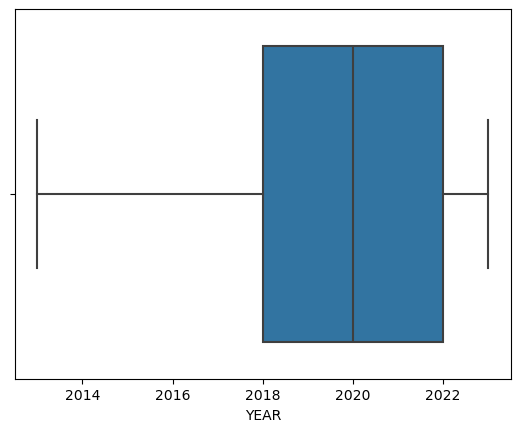

In [94]:
sns.boxplot(data=df_joined, x="YEAR")
plt.show();

In [95]:
filtered_df_year = df_joined.loc[df_joined['YEAR'] >= 2018]
filtered_df_year.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2970297 entries, 0 to 2970296
Columns: 151 entries, CRASH_RECORD_ID to YEAR
dtypes: datetime64[ns](1), float64(25), int32(1), int64(8), object(116)
memory usage: 3.4+ GB


## Takeaway

- Most of the crashes occurred between 2018-2022: maybe filter in the last 5-6 years?

- When filtered, we still have 2,970,297 observations

In [98]:
df_joined['CRASH_MONTH'].value_counts()

CRASH_MONTH
10    355075
9     335998
8     329775
7     322235
6     317526
5     313755
11    287487
12    282421
3     269733
4     262401
1     261442
2     256575
Name: count, dtype: int64

/Users/dre/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dre/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


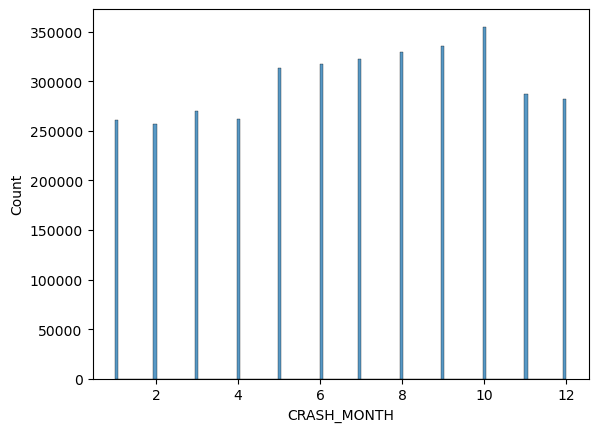

In [65]:
sns.histplot(data=df_joined, x="CRASH_MONTH")

plt.show();

In [55]:
df_joined['CRASH_HOUR'].value_counts()

CRASH_HOUR
16    294891
15    294185
17    286273
14    247023
18    234833
13    220238
12    207600
8     185699
11    175869
19    169682
10    153712
9     153253
7     149637
20    132830
21    121051
22    109946
23     92083
0      72147
6      68400
1      60957
2      50825
5      40552
3      39056
4      33681
Name: count, dtype: int64

## Takeaway

- Most crashes seem to happen in the afternoon

In [59]:
df_joined['CRASH_DAY_OF_WEEK'].value_counts(normalize=True)

CRASH_DAY_OF_WEEK
6    0.164049
7    0.152577
5    0.142170
3    0.140636
4    0.140353
2    0.134501
1    0.125714
Name: proportion, dtype: float64

/Users/dre/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dre/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


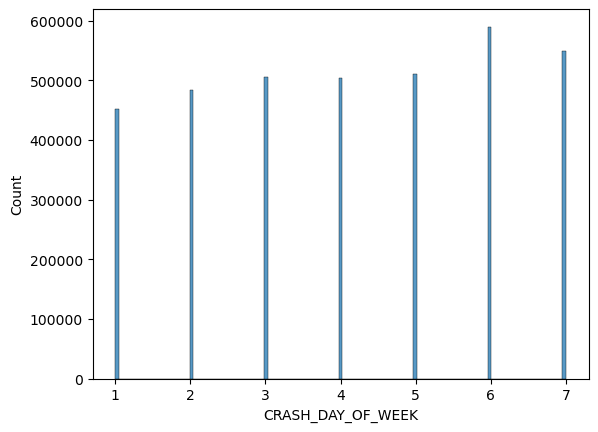

In [61]:
sns.histplot(data=df_joined, x="CRASH_DAY_OF_WEEK")

plt.show();

## Takeaway

- Nothing interesting. It seems that the crashes occur evenly across the days of the week.

### Analyzing Injuries

In [77]:
df_joined['INJURY_CLASSIFICATION'].value_counts()

INJURY_CLASSIFICATION
NO INDICATION OF INJURY     3266517
NONINCAPACITATING INJURY     184378
REPORTED, NOT EVIDENT        104566
INCAPACITATING INJURY         35112
FATAL                          2116
Name: count, dtype: int64

/Users/dre/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dre/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dre/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


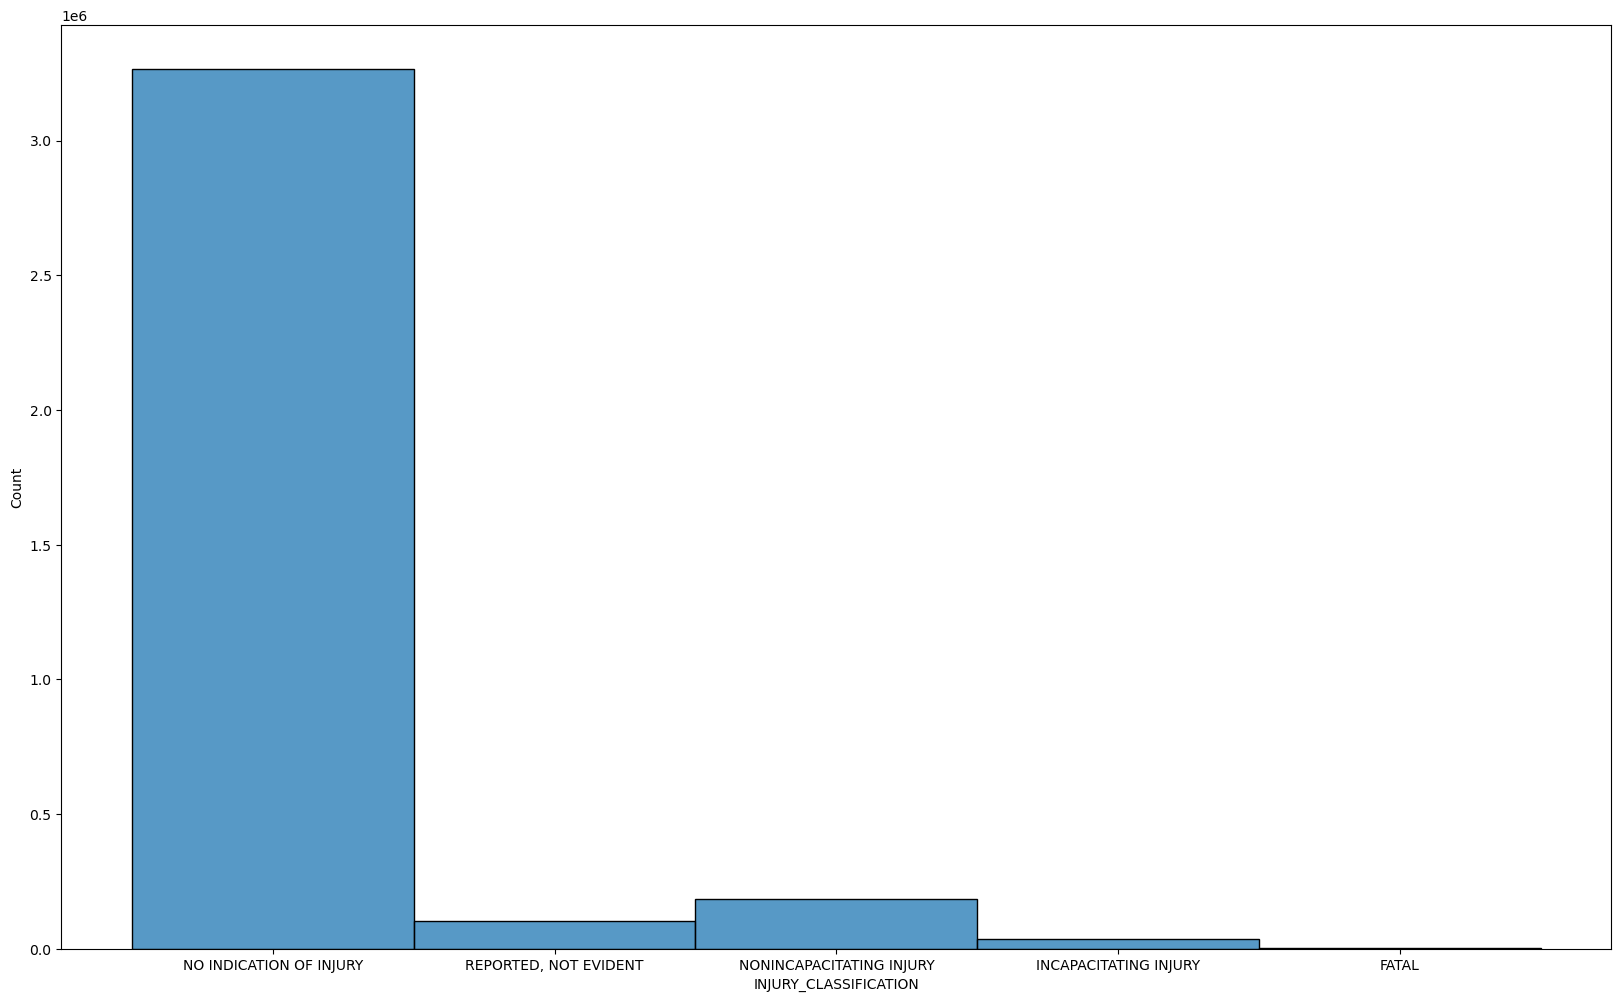

In [78]:
fig, ax = plt.subplots(figsize=(20, 12))

sns.histplot(data=df_joined, x='INJURY_CLASSIFICATION')

plt.show();

In [67]:
df_joined['INJURIES_TOTAL'].value_counts()

INJURIES_TOTAL
0.0     2917583
1.0      435667
2.0      138347
3.0       55013
4.0       25083
5.0       10639
6.0        5378
7.0        3002
8.0        1050
9.0         831
10.0        558
11.0        266
15.0        247
12.0        208
17.0        153
21.0        130
16.0         85
13.0         81
19.0         58
14.0         44
Name: count, dtype: int64

In [68]:
df_joined['INJURIES_FATAL'].value_counts()

INJURIES_FATAL
0.0    3588360
1.0       5289
2.0        626
3.0        108
4.0         40
Name: count, dtype: int64

In [69]:
df_joined['INJURIES_INCAPACITATING'].value_counts()

INJURIES_INCAPACITATING
0.0     3506592
1.0       70405
2.0       11701
3.0        3585
4.0        1275
5.0         461
6.0         311
10.0         36
7.0          33
8.0          24
Name: count, dtype: int64

In [70]:
df_joined['INJURIES_NON_INCAPACITATING'].value_counts()

INJURIES_NON_INCAPACITATING
0.0     3192072
1.0      274804
2.0       74819
3.0       28642
4.0       13120
5.0        5541
6.0        2473
7.0        1107
8.0         702
10.0        321
9.0         259
12.0        126
11.0        105
16.0         85
21.0         67
18.0         58
15.0         48
19.0         42
14.0         32
Name: count, dtype: int64

In [71]:
df_joined['INJURIES_NO_INDICATION'].value_counts()

INJURIES_NO_INDICATION
2.0     1533955
3.0      667638
1.0      626086
4.0      338786
5.0      178520
6.0       91314
0.0       59205
7.0       42629
8.0       22874
9.0       11334
10.0       6175
11.0       3525
12.0       1797
14.0       1376
13.0       1295
15.0        745
16.0        704
37.0        530
17.0        527
20.0        482
19.0        334
21.0        317
30.0        300
36.0        298
22.0        264
26.0        262
42.0        256
31.0        248
29.0        240
27.0        216
18.0        203
45.0        180
28.0        170
40.0        160
24.0        144
46.0        138
34.0        136
33.0        136
32.0        128
61.0        122
25.0        108
50.0        100
48.0         96
39.0         90
43.0         88
38.0         76
35.0         70
23.0         46
Name: count, dtype: int64

In [73]:
df_joined['INJURIES_REPORTED_NOT_EVIDENT'].value_counts()

INJURIES_REPORTED_NOT_EVIDENT
0.0     3348718
1.0      170603
2.0       47866
3.0       16454
4.0        5941
5.0        2549
6.0         863
7.0         476
9.0         400
8.0         201
10.0        169
11.0        121
15.0         62
Name: count, dtype: int64

In [74]:
df_joined['INJURIES_UNKNOWN'].value_counts()

INJURIES_UNKNOWN
0.0    3594423
Name: count, dtype: int64

In [53]:
df_joined['STREET_NAME'].value_counts()

STREET_NAME
WESTERN AVE              104834
PULASKI RD                98578
CICERO AVE                91622
ASHLAND AVE               83875
HALSTED ST                76361
                          ...  
LAKE SHORE DR NB RAMP         1
BLAKE ST                      1
HADDOCK PL                    1
LAFLIN AVE                    1
INDEPENDENCE SQ               1
Name: count, Length: 1629, dtype: int64

## Takeaway

- It is interesting that most accidents occur on Western Avenue

In [66]:
df_joined['STREET_DIRECTION'].value_counts()

STREET_DIRECTION
W    1292200
S    1210164
N     845874
E     246171
Name: count, dtype: int64

In [57]:
df_joined['ROADWAY_SURFACE_COND'].value_counts(normalize=True)

ROADWAY_SURFACE_COND
DRY                0.751849
WET                0.138986
UNKNOWN            0.068982
SNOW OR SLUSH      0.031212
ICE                0.006427
OTHER              0.002291
SAND, MUD, DIRT    0.000253
Name: proportion, dtype: float64

/Users/dre/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dre/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dre/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


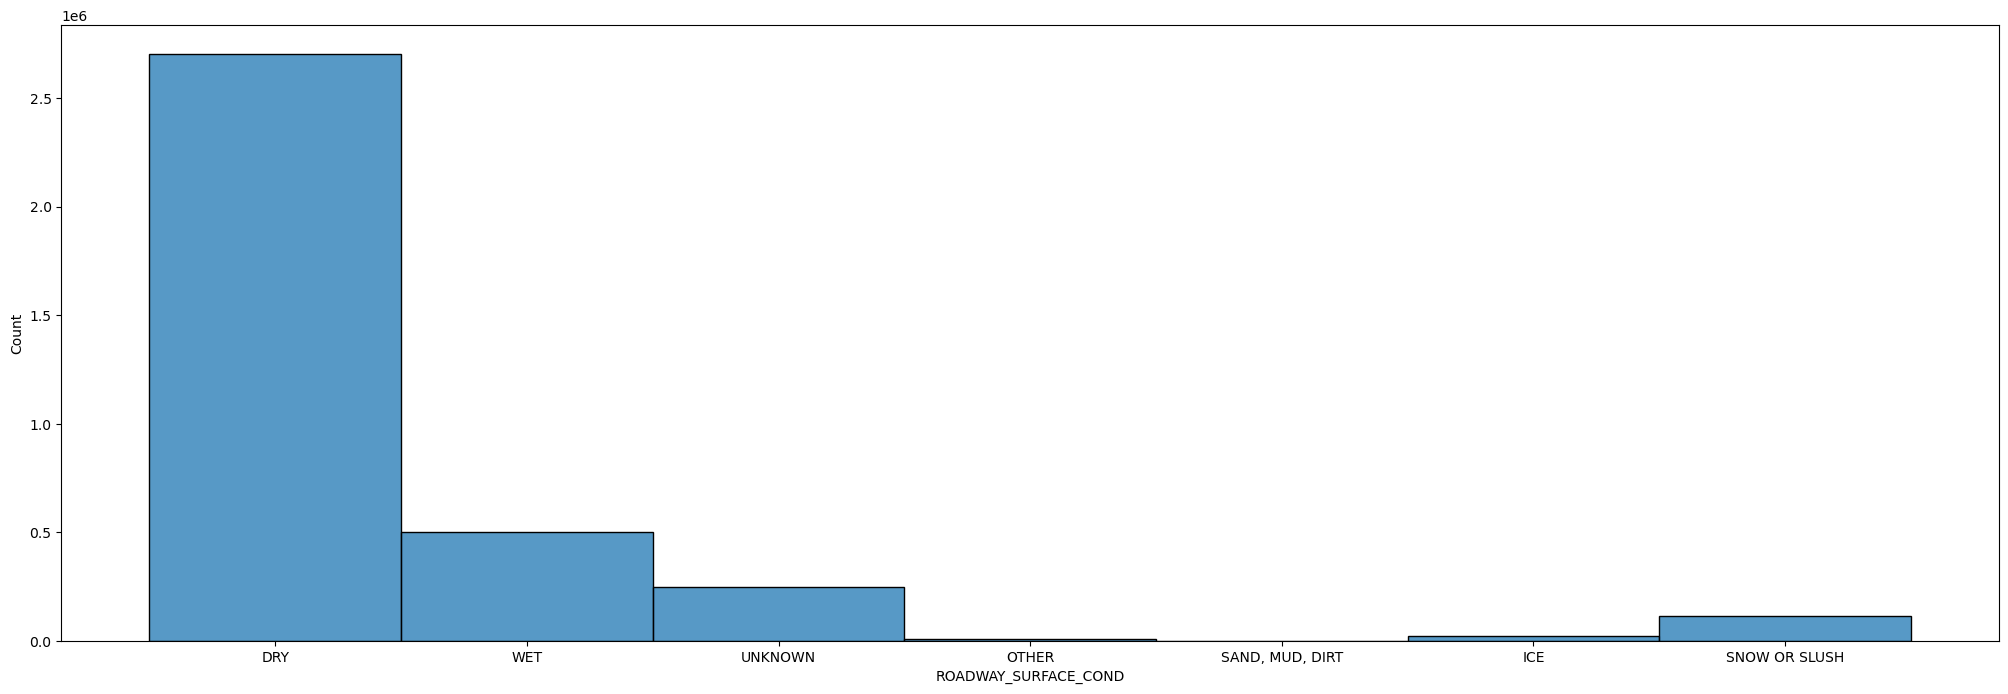

In [58]:
fig, ax = plt.subplots(figsize=(25, 8))

sns.histplot(data=df_joined, x="ROADWAY_SURFACE_COND")

plt.show();

## Takeaway

- Most accidents occur on dry surfaces

In [29]:
df_joined['DRIVER_VISION'].value_counts()

DRIVER_VISION
NOT OBSCURED              1457441
UNKNOWN                   1326337
OTHER                       27748
MOVING VEHICLES             16179
PARKED VEHICLES              9992
WINDSHIELD (WATER/ICE)       7745
BLINDED - SUNLIGHT           3279
TREES, PLANTS                1076
BUILDINGS                     940
BLINDED - HEADLIGHTS          283
BLOWING MATERIALS             194
HILLCREST                     185
EMBANKMENT                    167
SIGNBOARD                      70
Name: count, dtype: int64

In [30]:
df_joined['BAC_RESULT'].value_counts()

BAC_RESULT
TEST NOT OFFERED                   2811496
TEST REFUSED                         30552
TEST PERFORMED, RESULTS UNKNOWN       7388
TEST TAKEN                            5660
Name: count, dtype: int64

In [26]:
df_joined["FIRST_CRASH_TYPE"].value_counts()

FIRST_CRASH_TYPE
REAR END                        1012093
SIDESWIPE SAME DIRECTION         621164
TURNING                          610452
PARKED MOTOR VEHICLE             488191
ANGLE                            480926
PEDESTRIAN                        85286
SIDESWIPE OPPOSITE DIRECTION      61788
FIXED OBJECT                      55232
PEDALCYCLIST                      53252
HEAD ON                           41388
REAR TO FRONT                     36668
REAR TO SIDE                      21881
OTHER OBJECT                      12949
REAR TO REAR                       7362
OTHER NONCOLLISION                 3828
ANIMAL                              915
OVERTURNED                          875
TRAIN                               173
Name: count, dtype: int64

/Users/dre/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dre/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dre/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


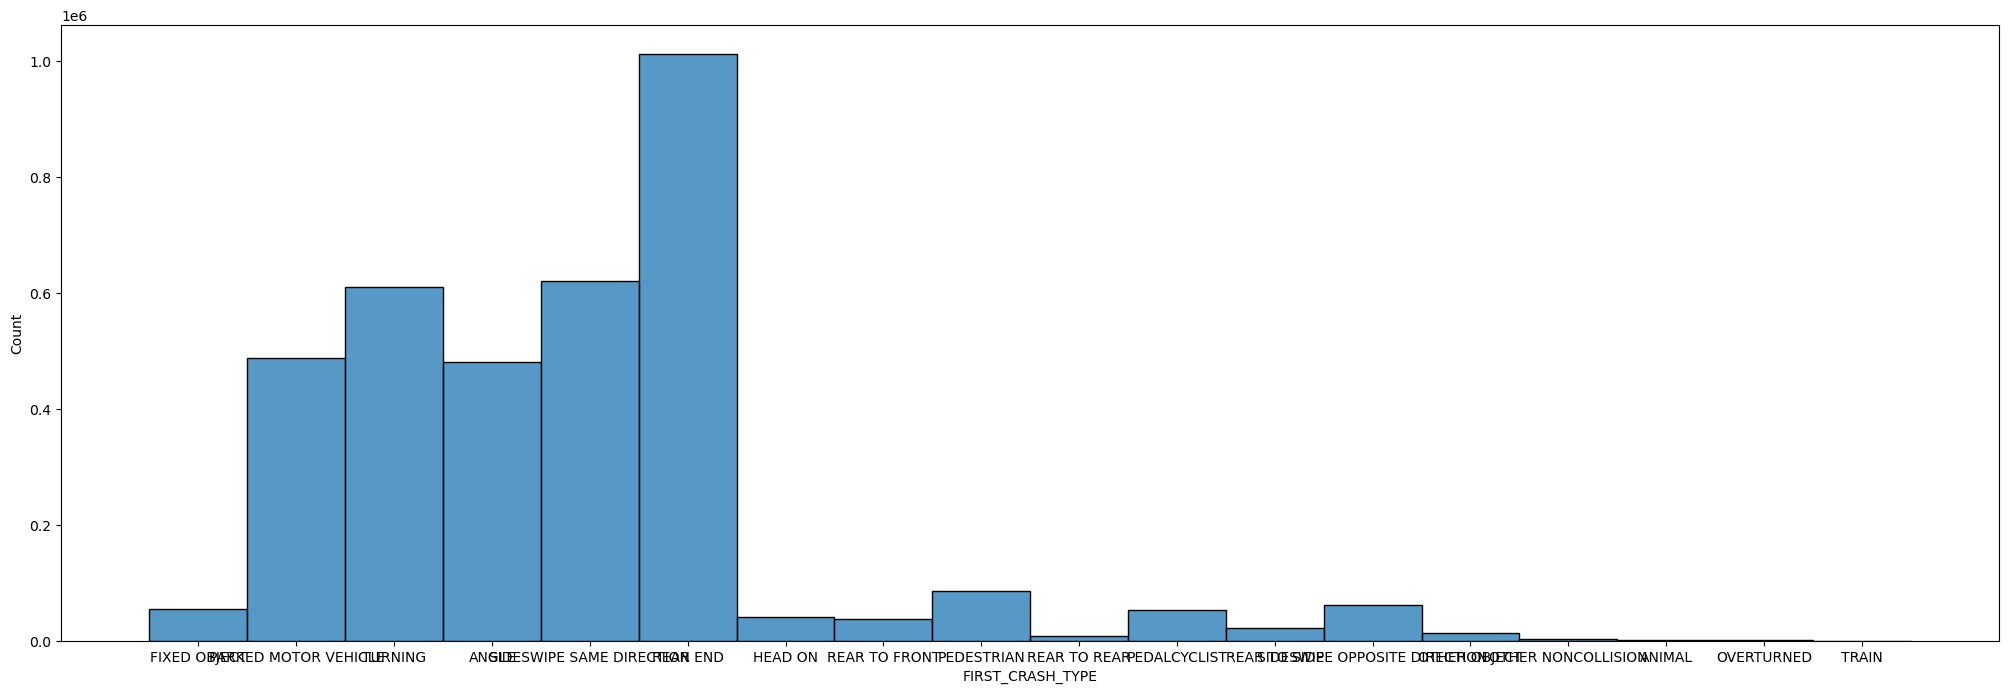

In [28]:
fig, ax = plt.subplots(figsize=(25, 8))

sns.histplot(data=df_joined, x="FIRST_CRASH_TYPE")

plt.show();

- There are missing observations from columns RD_NO, CRASH_DATE_EST_I, LANE_CNT, REPORT_TYPE, INTERSECTION_RELATED_I, NOT_RIGHT_OF_WAY_I, HIT_AND_RUN_I, STREET_DIRECTION, STREET_NAME, BEAT_OF_OCCURRENCE, PHOTOS_TAKEN_I, STATEMENTS_TAKEN_I, DOORING_I, WORK_ZONE_I, WORK_ZONE_TYPE, WORKERS_PRESENT_I, MOST_SEVERE_INJURY, INJURIES_TOTAL, INJURIES_FATAL, INJURIES_INCAPACITATING, INJURIES_NON_INCAPACITATING, INJURIES_REPORTED_NOT_EVIDENT, INJURIES_NO_INDICATION, INJURIES_UNKNOWN, LATITUDE, LONGITUDE, LOCATION, Boundaries - ZIP Codes.

In [6]:
df_crashes.describe()

,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,Boundaries - ZIP Codes
count,778847.000000,1.990060e+05,778847.000000,778842.000000,778847.000000,777144.000000,777144.000000,777144.000000,777144.000000,777144.000000,777144.000000,777144.0,778847.000000,778847.000000,778847.000000,773629.000000,773629.000000,773247.000000
mean,28.396907,1.333032e+01,3685.933360,1242.603116,2.034754,0.188778,0.001194,0.020112,0.106705,0.060767,2.004773,0.0,13.205675,4.122012,6.696038,41.854822,-87.673523,32.233258
std,6.192316,2.961623e+03,2888.342841,705.370152,0.452267,0.564532,0.037466,0.166103,0.421350,0.317185,1.159469,0.0,5.565372,1.980178,3.367947,0.334037,0.678644,19.205914
min,0.000000,0.000000e+00,0.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,-87.936193,1.000000
25%,30.000000,2.000000e+00,1245.000000,714.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,4.000000,41.782381,-87.721652,15.000000
50%,30.000000,2.000000e+00,3200.000000,1211.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,7.000000,41.874687,-87.674050,32.000000
75%,30.000000,4.000000e+00,5600.000000,1822.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,10.000000,41.924284,-87.633269,52.000000
max,99.000000,1.191625e+06,451100.000000,6100.000000,18.000000,21.000000,4.000000,10.000000,21.000000,15.000000,61.000000,0.0,23.000000,7.000000,12.000000,42.022780,0.000000,61.000000


In [7]:
df_crashes.isna().sum()

CRASH_RECORD_ID                       0
RD_NO                              4555
CRASH_DATE_EST_I                 720341
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
LANE_CNT                         579841
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
REPORT_TYPE                       22589
CRASH_TYPE                            0
INTERSECTION_RELATED_I           600409
NOT_RIGHT_OF_WAY_I               742793
HIT_AND_RUN_I                    535597
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NO                             0


In [32]:
# Checking out the SEC_CONTRIBUTORY_CAUSE column

df_joined['SEC_CONTRIBUTORY_CAUSE'].value_counts()

SEC_CONTRIBUTORY_CAUSE
NOT APPLICABLE                                                                      1430636
UNABLE TO DETERMINE                                                                 1233455
FAILING TO REDUCE SPEED TO AVOID CRASH                                               165646
FAILING TO YIELD RIGHT-OF-WAY                                                        131494
FOLLOWING TOO CLOSELY                                                                116056
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  114273
IMPROPER OVERTAKING/PASSING                                                           61138
IMPROPER LANE USAGE                                                                   54792
WEATHER                                                                               43776
IMPROPER TURNING/NO SIGNAL                                                            42082
OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGE

## Takeaway

- Most of the observations most likely do not have a secondary contributory cause, hence the NOT APPLICABLE to have the most counts.

- The second most of the secondary contributory causes is also unable to be determined.

- The third most of the secondary contributory causes is FAILING TO REDUCE SPEED TO AVOID CRASH.

In [31]:
df_joined['WEATHER_CONDITION'].value_counts()

WEATHER_CONDITION
CLEAR                       2863724
RAIN                         328696
UNKNOWN                      145143
SNOW                         115821
CLOUDY/OVERCAST              111019
OTHER                         11133
FREEZING RAIN/DRIZZLE          6757
FOG/SMOKE/HAZE                 5226
SLEET/HAIL                     4441
BLOWING SNOW                   1924
SEVERE CROSS WIND GATE          513
BLOWING SAND, SOIL, DIRT         26
Name: count, dtype: int64

## Takeaway

- Most of the crashes occurs in clear weather, while 2nd most occurs in the rain.
- there are 41911 observations with unknown weather

In [34]:
df_joined['LIGHTING_CONDITION'].value_counts()

LIGHTING_CONDITION
DAYLIGHT                  2365668
DARKNESS, LIGHTED ROAD     794831
DARKNESS                   155495
UNKNOWN                    111891
DUSK                       109476
DAWN                        57062
Name: count, dtype: int64

## Takeaway

- Most of the crashes occurs in the daylight
- 34855 observations had unknown lighting condition

In [35]:
# Checking out the POSTED_SPEED_LIMIT column

df_joined['POSTED_SPEED_LIMIT'].value_counts()

POSTED_SPEED_LIMIT
30    2740939
35     259057
25     200093
20     120183
15      93369
10      59350
40      41725
0       28684
45      27766
5       15349
55       3824
50       1070
3         864
9         400
39        360
99        291
60        225
1         125
24        122
2          82
65         82
32         75
33         62
34         54
11         40
26         35
36         30
6          26
7          22
14         16
31         14
29         11
22         10
70          9
12          9
8           8
38          8
23          8
4           7
44          6
18          6
63          4
62          2
49          1
Name: count, dtype: int64

## Takeaway

- The speed limit mostly associated with the crashes seems to be about 30 MPH.
- The top 3 crashes seem to happen at low speed limit areas.

In [36]:
df_joined['MAKE'].value_counts()

MAKE
CHEVROLET                                 421255
FORD                                      357323
NISSAN                                    295989
UNKNOWN                                   267241
HONDA                                     263444
                                           ...  
RACMAC TRAILER                                 1
TBC                                            1
XPLORER ENTERPRISES OF CONSTANTINE             1
CONSTRUCTION MACHINERY COMPANY                 1
AZTEC PRODUCTS, INC., MANSFIELD, TEXAS         1
Name: count, Length: 1309, dtype: int64

In [49]:
df_joined['MODEL'].value_counts()

MODEL
UNKNOWN                                    372000
OTHER (EXPLAIN IN NARRATIVE)               271789
CAMRY                                      115822
COROLLA                                     72132
CIVIC                                       67808
                                            ...  
HALLMARK MOTOR HOME                             1
SUTPHEN CORP., AMLIN, OH                        1
TIOGA MOTOR HOME                                1
PIEDMONT, DIVISION CONCORD MOBILE HOMES         1
SKYCRAFT TRAILER                                1
Name: count, Length: 2677, dtype: int64

In [37]:
df_joined['VEHICLE_DEFECT'].value_counts()

VEHICLE_DEFECT
NONE                1964968
UNKNOWN             1510026
OTHER                 17456
BRAKES                12356
TIRES                  1467
STEERING               1234
WHEELS                  711
ENGINE/MOTOR            487
SUSPENSION              407
FUEL SYSTEM             407
LIGHTS                  222
WINDOWS                 203
CARGO                   102
SIGNALS                  90
RESTRAINT SYSTEM         54
EXHAUST                  44
TRAILER COUPLING         37
Name: count, dtype: int64

In [50]:
df_joined['NUM_PASSENGERS'].value_counts()

NUM_PASSENGERS
1.0     552154
2.0     190897
3.0      92755
4.0      36467
5.0      11611
6.0       5124
7.0       2089
8.0       1072
10.0       882
9.0        730
11.0       595
12.0       523
14.0       341
15.0       262
13.0       254
17.0       215
19.0       211
18.0       202
43.0       181
27.0       176
16.0       164
35.0       152
28.0       151
26.0       141
34.0       111
25.0       109
20.0       108
32.0       102
46.0        98
29.0        95
21.0        90
42.0        88
40.0        84
38.0        80
24.0        78
36.0        75
33.0        72
30.0        64
59.0        61
23.0        51
22.0        48
37.0        38
31.0        34
Name: count, dtype: int64

In [45]:
df_joined["VEHICLE_YEAR"].value_counts()

VEHICLE_YEAR
2015.0    226568
2016.0    212398
2017.0    211805
2014.0    200192
2013.0    183942
           ...  
4449.0         1
3007.0         1
2999.0         1
2078.0         1
6043.0         1
Name: count, Length: 225, dtype: int64

## Takeaway

- There are vehicle years that does not make sense. Example: 4449
- The vehicles mostly involved are fairly new, in the last 10 years.

In [39]:
df_joined['AIRBAG_DEPLOYED'].value_counts()

AIRBAG_DEPLOYED
DID NOT DEPLOY                            1852831
DEPLOYMENT UNKNOWN                         714249
NOT APPLICABLE                             710486
DEPLOYED, FRONT                            118191
DEPLOYED, COMBINATION                       93050
DEPLOYED, SIDE                              32642
DEPLOYED OTHER (KNEE, AIR, BELT, ETC.)       1819
Name: count, dtype: int64

In [46]:
df_joined['DRIVER_VISION'].value_counts()

DRIVER_VISION
NOT OBSCURED              1457441
UNKNOWN                   1326337
OTHER                       27748
MOVING VEHICLES             16179
PARKED VEHICLES              9992
WINDSHIELD (WATER/ICE)       7745
BLINDED - SUNLIGHT           3279
TREES, PLANTS                1076
BUILDINGS                     940
BLINDED - HEADLIGHTS          283
BLOWING MATERIALS             194
HILLCREST                     185
EMBANKMENT                    167
SIGNBOARD                      70
Name: count, dtype: int64

In [40]:
df_joined['DRIVER_ACTION'].value_counts()

DRIVER_ACTION
NONE                                 1039737
UNKNOWN                               707436
FAILED TO YIELD                       257488
OTHER                                 250703
FOLLOWED TOO CLOSELY                  173630
IMPROPER BACKING                       81236
IMPROPER TURN                          72431
IMPROPER LANE CHANGE                   72206
IMPROPER PASSING                       62579
DISREGARDED CONTROL DEVICES            51222
TOO FAST FOR CONDITIONS                43784
WRONG WAY/SIDE                         12186
IMPROPER PARKING                       10146
EVADING POLICE VEHICLE                  4750
OVERCORRECTED                           4742
CELL PHONE USE OTHER THAN TEXTING       4386
EMERGENCY VEHICLE ON CALL               2485
TEXTING                                 1160
STOPPED SCHOOL BUS                       342
LICENSE RESTRICTIONS                     123
Name: count, dtype: int64

## Takeaway

- None and Unknown dominates
- Failure to Yield is number 3

In [41]:
df_joined['EJECTION'].value_counts()

EJECTION
NONE                  3319935
UNKNOWN                212173
TOTALLY EJECTED         10817
PARTIALLY EJECTED        2713
TRAPPED/EXTRICATED       2145
Name: count, dtype: int64

In [43]:
df_joined['CITY'].value_counts()

CITY
CHICAGO          1860855
CICERO             26168
SKOKIE             16658
BERWYN             14656
EVANSTON           14484
                  ...   
B                      1
KEATCHIE               1
MEXICO BEACH           1
CRYSTAL FALLS          1
FORST                  1
Name: count, Length: 12986, dtype: int64

In [44]:
df_joined['AGE'].value_counts()

AGE
 25.0     72309
 27.0     71808
 26.0     71720
 28.0     70531
 24.0     69878
          ...  
-47.0         4
-59.0         2
-49.0         2
-40.0         2
 106.0        2
Name: count, Length: 117, dtype: int64

## Takeaway

- Has some negative ages, need to investigate
- Most accidents occur caused by mid to late 20's